In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chess/games.csv


In [2]:
df = pd.read_csv('/kaggle/input/chess/games.csv')

In [3]:
df.head

<bound method NDFrame.head of              id  rated    created_at  last_move_at  turns victory_status  \
0      TZJHLljE  False  1.504210e+12  1.504210e+12     13      outoftime   
1      l1NXvwaE   True  1.504130e+12  1.504130e+12     16         resign   
2      mIICvQHh   True  1.504130e+12  1.504130e+12     61           mate   
3      kWKvrqYL   True  1.504110e+12  1.504110e+12     61           mate   
4      9tXo1AUZ   True  1.504030e+12  1.504030e+12     95           mate   
...         ...    ...           ...           ...    ...            ...   
20053  EfqH7VVH   True  1.499791e+12  1.499791e+12     24         resign   
20054  WSJDhbPl   True  1.499698e+12  1.499699e+12     82           mate   
20055  yrAas0Kj   True  1.499698e+12  1.499698e+12     35           mate   
20056  b0v4tRyF   True  1.499696e+12  1.499697e+12    109         resign   
20057  N8G2JHGG   True  1.499643e+12  1.499644e+12     78           mate   

      winner increment_code       white_id  white_rating 

In [4]:
pd.crosstab(df['winner'],df['turns'])

turns,1,2,3,4,5,6,7,8,9,10,...,210,212,216,218,221,222,226,255,259,349
winner,,,,,,,,,,,,,,,,,,,,,
black,2,108,13,36,3,26,4,32,8,44,...,2,0,0,1,0,1,0,0,0,0
draw,0,2,11,3,2,4,5,6,3,4,...,0,1,1,0,1,1,1,1,1,0
white,16,75,63,13,35,5,61,16,65,16,...,0,0,0,0,0,0,0,0,0,2


In [13]:
import numpy as np
df['winnerdigit'] = np.where(df['winner']=="black","1",df['winner'])
df['winnerdigit'] = np.where(df['winnerdigit']=="white","2",df['winnerdigit'])
df['winnerdigit'] = np.where(df['winnerdigit']=="draw","0",df['winnerdigit'])

In [16]:
pd.crosstab(df['winner'],df['victory_status'])

victory_status,draw,mate,outoftime,resign
winner,,,,
black,0,2981,823,5303
draw,906,0,44,0
white,0,3344,813,5844


In [14]:
df.groupby('winnerdigit')['turns'].mean().reset_index()

,winnerdigit,turns
0,0,86.157895
1,1,60.724388
2,2,57.790221


In [17]:
df.groupby('victory_status')['turns'].mean().reset_index()

,victory_status,turns
0,draw,83.781457
1,mate,65.415020
2,outoftime,72.742857
3,resign,53.912533


In [5]:
df.groupby('winner')['turns'].mean().reset_index()

,winner,turns
0,black,60.724388
1,draw,86.157895
2,white,57.790221


In [6]:
import matplotlib.pyplot as plt

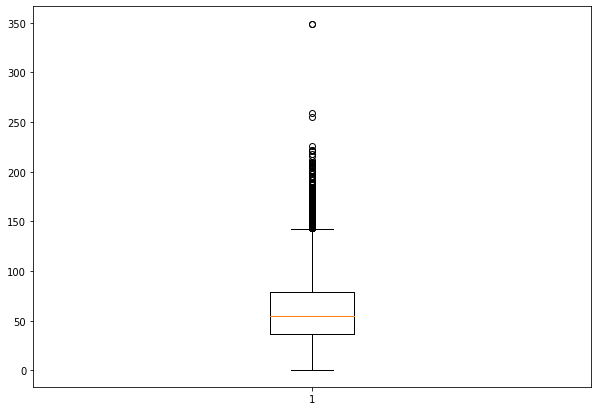

In [7]:
data = df['turns']
 
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(data)
 
# show plot
plt.show()